<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM3/Computer%20Vision/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shiladitya 2348556 ⭕

<a href="https://colab.research.google.com/github/swastikbanerjee/CV_Lab/blob/main/cv_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement various image enhancement techniques using Built-in and user defined functions.**

**1. Image Negative**

**2. Gray Level Slicing**

**3. Histogram Equalization**

**Importing Necessary Libraries**

In [8]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

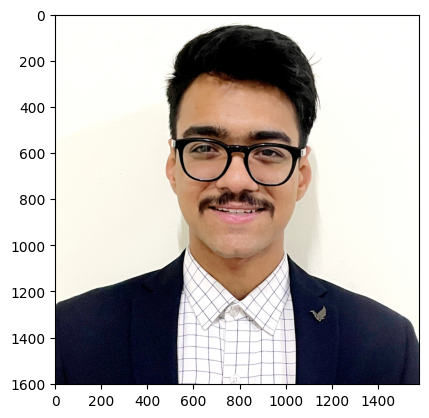

In [9]:
#Printing the original image
img_bgr = cv2.cvtColor(cv2.imread("IMG_5936.JPG"), cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr)
plt.show()

**1. IMAGE NEGATIVE**

---

When we try to negatively transform an image, the brightest areas are transformed into the darkest and the darkest areas are transformed into the brightest. As we know, a color image stores 3 different channels. They are red, green and blue. That’s why color images are also known as RGB images. So, if we need a negative transformation of an image then we need to invert these 3 channels.

**First method:**

---
1. Read an image
2. Get height and width of the image
3. Each pixel contains 3 channels. So, take a pixel value and collect 3 channels in 3 different variables.
4. Negate 3 pixels values from 255 and store them again in pixel used before.
5. Do it for all pixel values present in image.

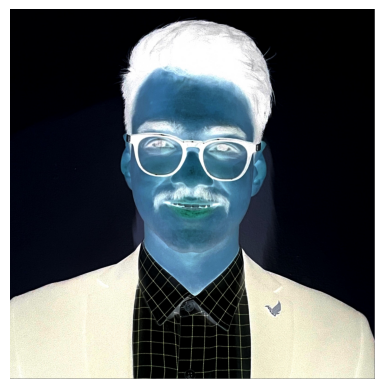

In [10]:
height, width, _ = img_bgr.shape
for i in range(0, height - 1):
	for j in range(0, width - 1):
		pixel = img_bgr[i, j]
		pixel[0] = 255 - pixel[0]
		pixel[1] = 255 - pixel[1]
		pixel[2] = 255 - pixel[2]
		img_bgr[i, j] = pixel
plt.imshow(img_bgr)
plt.axis('off')
plt.show()

**2nd method:**

1. Read an image and store it in a variable.
2. Subtract the variable from 1 and store the value in another variable.

For colored images, we will subtract 255 from all the values of all 3 channels (RGB) and take its absolute value (positive value).
For a grayscale image, we have just 1 channel and there also we will subtract 255 from those pixel values (pixel value ranges from 0–255 in grayscale images) and take absolute values.
We can consider negative images as the exact opposite of the original images, if we add both, the original image and the negative image, we will get a pure white image.

In [11]:
img = cv2.imread("IMG_5936.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.imread("IMG_5936.JPG", 0)
colored_negative = abs(255-img)
gray_negative = abs(255-gray)

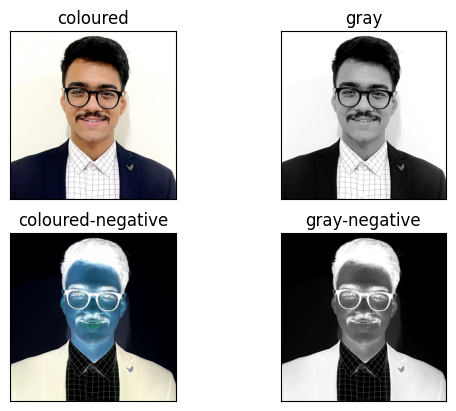

In [12]:
imgs = [img, gray, colored_negative, gray_negative]
title = ['coloured', 'gray', 'coloured-negative', 'gray-negative']
plt.subplot(2, 2, 1)
plt.title(title[0])
plt.imshow(imgs[0])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.title(title[1])
plt.imshow(imgs[1], cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.title(title[2])
plt.imshow(imgs[2])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4)
plt.title(title[3])
plt.imshow(imgs[3], cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()

**Bitwise NOT operation on Image:**

---
Inversion of input array elements.

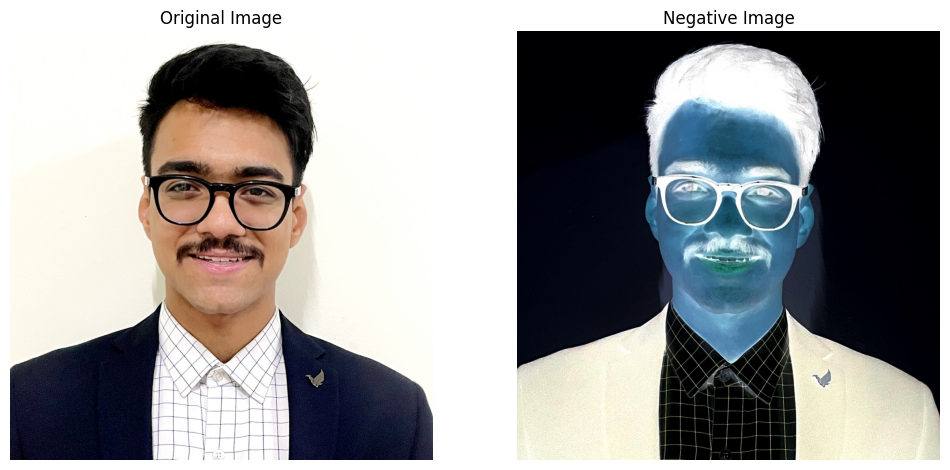

In [13]:
image = cv2.imread('IMG_5936.JPG')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
negative_image = cv2.bitwise_not(image_rgb)
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Negative Image")
plt.imshow(negative_image, cmap='gray')
plt.axis('off')
plt.show()

**GRAY LEVEL SLICING**

---
Gray level slicing, also known as intensity slicing or contrast stretching, is a technique used in image processing to enhance the contrast of an image by selectively highlighting a specific range of gray levels. This technique is particularly useful when the contrast in an image is low, making it difficult to distinguish between different objects or features.

The process of gray level slicing involves setting a threshold range of gray levels and then mapping all pixel values within that range to a new value, while leaving the pixel values outside the range unchanged. This effectively stretches the contrast of the image, making the objects or features within the specified gray level range more distinguishable.


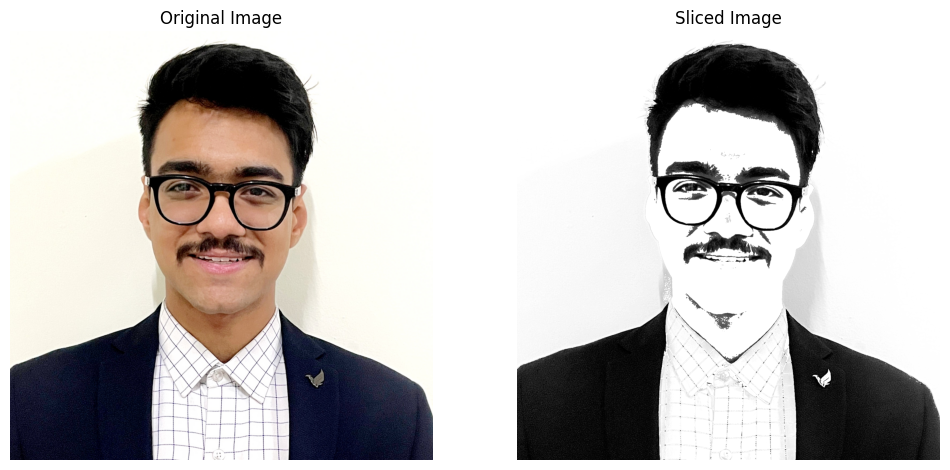

In [14]:
def gray_level_slicing(image, lower_threshold, upper_threshold, highlight_value):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = np.logical_and(gray_image >= lower_threshold, gray_image <= upper_threshold)
    gray_image[mask] = highlight_value
    return gray_image

image = cv2.imread('IMG_5936.JPG')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

sliced_image = gray_level_slicing(image, 100, 200, 255)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sliced Image")
plt.imshow(sliced_image, cmap='gray')
plt.axis('off')
plt.show()

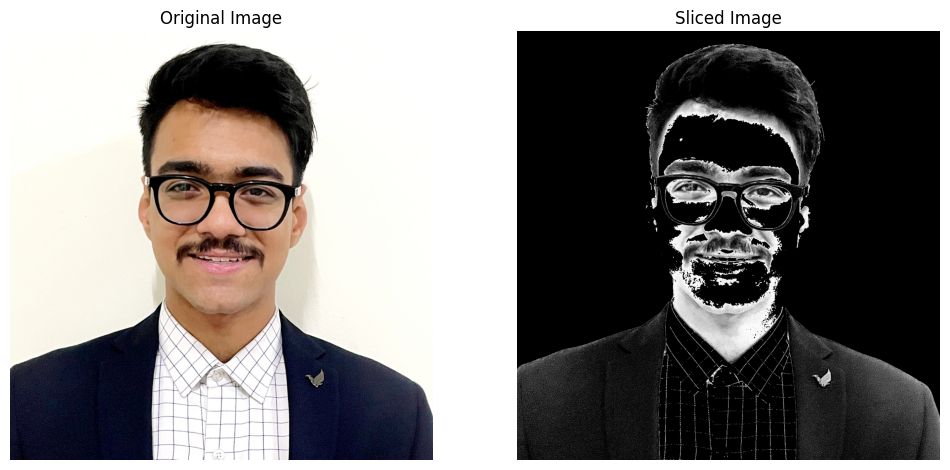

In [15]:
image = cv2.imread('IMG_5936.JPG')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask = cv2.inRange(gray_image, 0,150)
sliced_image = cv2.bitwise_and(gray_image, gray_image, mask=mask)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sliced Image")
plt.imshow(sliced_image, cmap='gray')
plt.axis('off')
plt.show()

**Histogram Equalization**

---



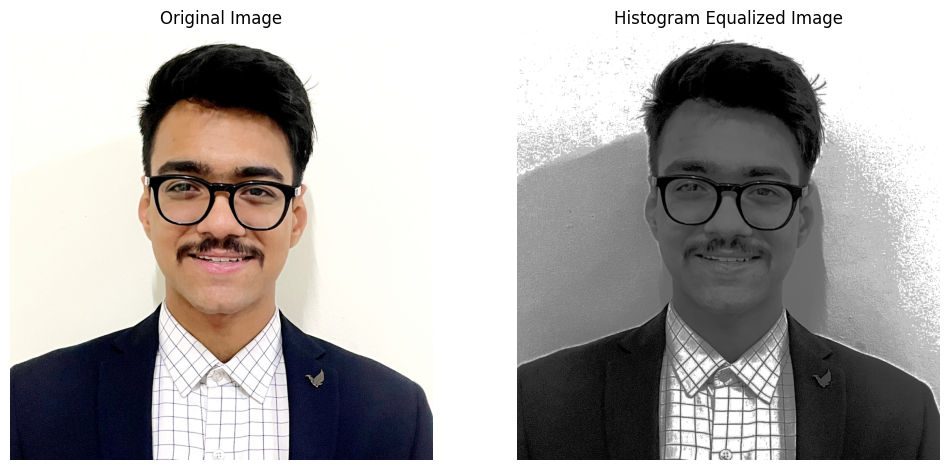

In [16]:
def global_histogram_equalization(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)
    return equalized_image

image = cv2.imread('IMG_5936.JPG')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

equalized_image = global_histogram_equalization(image)
equalized_image_rgb = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Histogram Equalized Image")
plt.imshow(equalized_image_rgb)
plt.axis('off')
plt.show()

**Adaptive Histogram Equalization:**

---



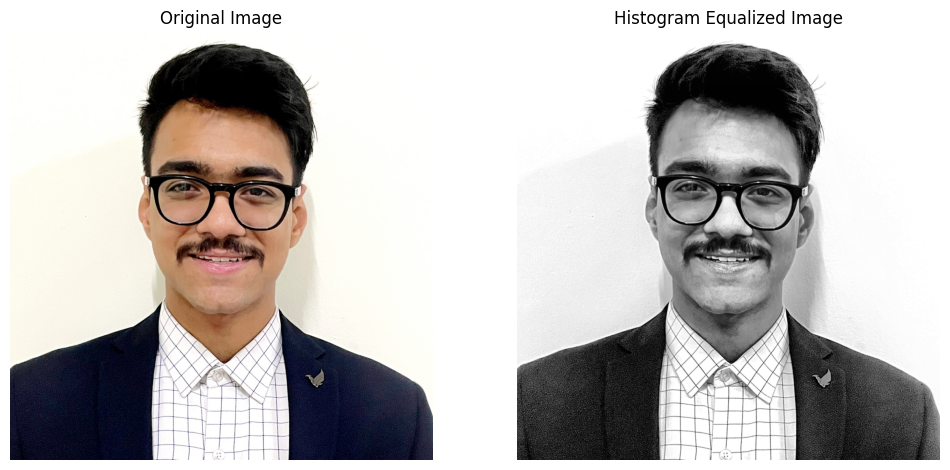

In [17]:
image = cv2.imread('IMG_5936.JPG')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_image = clahe.apply(gray_image)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Histogram Equalized Image")
plt.imshow(equalized_image,"gray")
plt.axis('off')
plt.show()